In [2]:
# The Nigeria house dataset contains 8 columns and 24326 instances of data:
# - bedrooms
# - bathrooms
# - toilets
# - parking_space
# - title
# - town
# - state
# - price


### Loading of libraries needed for the research 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


### Loading dataset

In [4]:
df = pd.read_csv("nigeria_houses_data.csv")
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


### checking the shape of the dataset

In [5]:
df.shape

(24326, 8)

### checking the datatype of each columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


### Data Preprocessing 

### checking for missing value

In [7]:
df.isna().sum() 

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

### checking for inconsistency in the data

#### Unique States in the Dataset

In [8]:
df['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

#### List of Towns Associated with the Mislabelled State 'Anambara

In [9]:
df[df['state']=='Anambara']['town'].unique()

array(['Lekki', 'Ibeju Lekki', 'Agege', 'Ikoyi', 'Mowe Ofada', 'Yaba',
       'Ifako-Ijaiye', 'Mowe Town', 'Port Harcourt', 'Ajah', 'Ikeja',
       'Alimosho', 'Ibadan', 'Ketu', 'Mbora (Nbora)',
       'Victoria Island (VI)', 'Gwarinpa', 'Akure', 'Karu', 'Ikorodu',
       'Ikotun', 'Lokogoma District', 'Shomolu', 'Guzape District',
       'Owerri Municipal', 'Katampe', 'Magboro', 'Gbagada', 'Ojo',
       'Arepo', 'Jabi'], dtype=object)

#### Removing Incorrect State Entries

In [10]:
df = df[df['state'] != 'Anambara'].copy()
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


The state entry 'Anambara' was identified as a misspelling of 'Anambra'. Upon review, it was discovered that the towns listed under 'Anambara' did not correspond to locations within Anambra State. To ensure data accuracy and integrity, all entries associated with 'Anambara' were removed from the dataset.

### Display summary statistics for the numerical columns in the DataFrame

In [11]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24181.000000,24181.000000,24181.000000,24181.000000,2.418100e+04
mean,4.344196,4.604317,5.180431,4.044043,3.026198e+08
std,1.136292,1.162093,1.225079,1.400374,1.224055e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


### Data Exploration

##### Distribution of Property Types in the Nigeria House Price Dataset

In [12]:
house_type = df['title'].value_counts()
house_type

Detached Duplex           13971
Terraced Duplexes          3216
Semi Detached Duplex       2594
Detached Bungalow          2087
Block of Flats             1724
Semi Detached Bungalow      432
Terraced Bungalow           157
Name: title, dtype: int64

#### Analysis of House Types Distribution in the Nigeria House Price Dataset using barchart

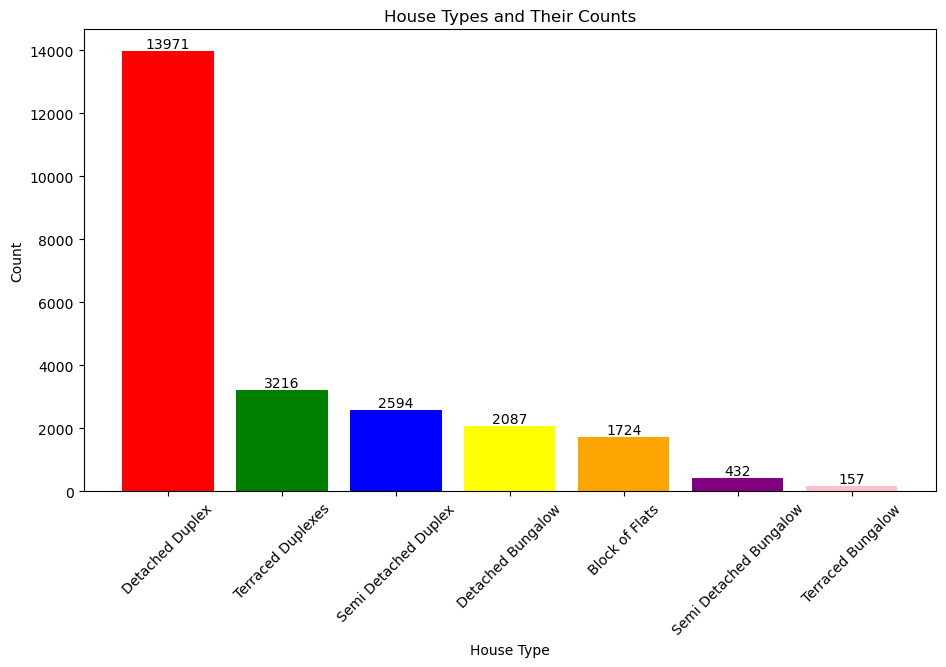

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and 'title' is the column you're analyzing
house_type = df['title'].value_counts()

# Converting the Series to index and values for plotting
house_type_index = house_type.index
house_type_values = house_type.values

# Setting figure size
plt.figure(figsize=(11, 6))

# Define a list of colors, making sure it matches the number of unique house types
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta'][:len(house_type_index)]

# Plotting the bar chart
bars = plt.bar(house_type_index, height=house_type_values, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('House Types and Their Counts')
plt.xlabel('House Type')
plt.ylabel('Count')

plt.savefig("housetype.png",dpi=1000)
# Displaying the plot
plt.show()


#### Top 10 States with the Highest Number of Listings in the Nigeria House Price Dataset


In [14]:
df['state'].value_counts().sort_values(ascending=False)[0:10]

Lagos        18445
Abuja         3524
Ogun           637
Oyo            477
Rivers         444
Imo            246
Enugu          128
Edo            100
Delta           63
Akwa Ibom       25
Name: state, dtype: int64

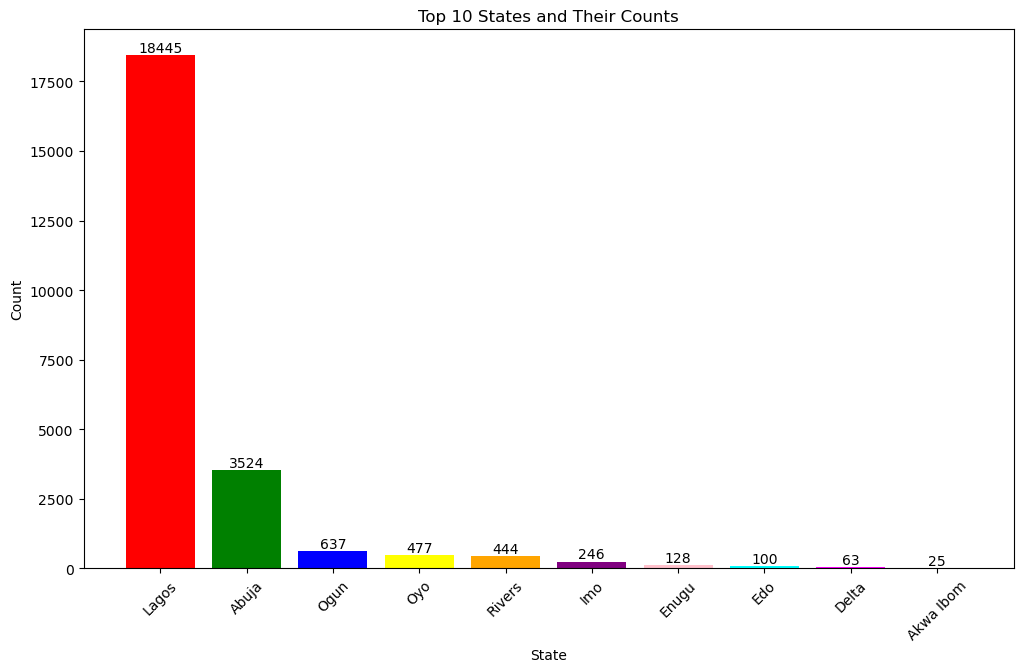

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
# df = pd.DataFrame({'state': ['State1', 'State2', ...]})

# Get the top 10 states
top_10_states = df['state'].value_counts().sort_values(ascending=False).head(10)

# Extracting indices and values
state_names = top_10_states.index
state_counts = top_10_states.values

# Setting figure size
plt.figure(figsize=(12, 7))

# Colors for each bar (ensuring there are 10 colors)
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']

# Plotting the bar chart
bars = plt.bar(state_names, height=state_counts, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('Top 10 States and Their Counts')
plt.xlabel('State')
plt.ylabel('Count')

# Displaying the plot
plt.show()


#### Top 10 Towns in Lagos with the Highest Number of Listings in the Nigeria House Price Dataset

In [16]:
df[df['state']=='Lagos']['town'].value_counts().sort_values(ascending=False)[0:10]

Lekki                   10841
Ajah                     2142
Ikoyi                    1541
Ikeja                     686
Victoria Island (VI)      493
Ibeju Lekki               492
Magodo                    375
Ikorodu                   236
Isheri North              194
Isolo                     176
Name: town, dtype: int64

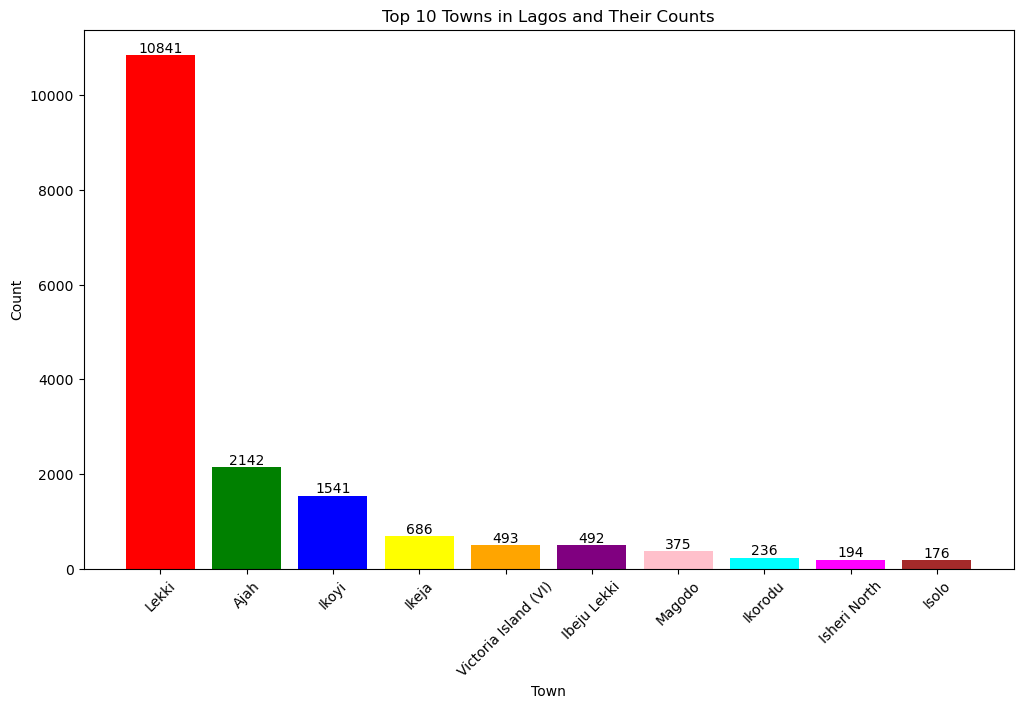

In [17]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter DataFrame for rows where state is 'Lagos'
lagos_towns = df[df['state'] == 'Lagos']['town']

# Get the top 10 towns in Lagos
top_10_towns = lagos_towns.value_counts().sort_values(ascending=False).head(10)

# Extracting indices and values
town_names = top_10_towns.index
town_counts = top_10_towns.values

# Setting figure size
plt.figure(figsize=(12, 7))

# Colors for each bar (ensuring there are 10 colors)
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']

# Plotting the bar chart
bars = plt.bar(town_names, height=town_counts, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('Top 10 Towns in Lagos and Their Counts')
plt.xlabel('Town')
plt.ylabel('Count')

# Displaying the plot
plt.show()


#### KDE Plot of Price Distribution in the Nigeria House Price Dataset


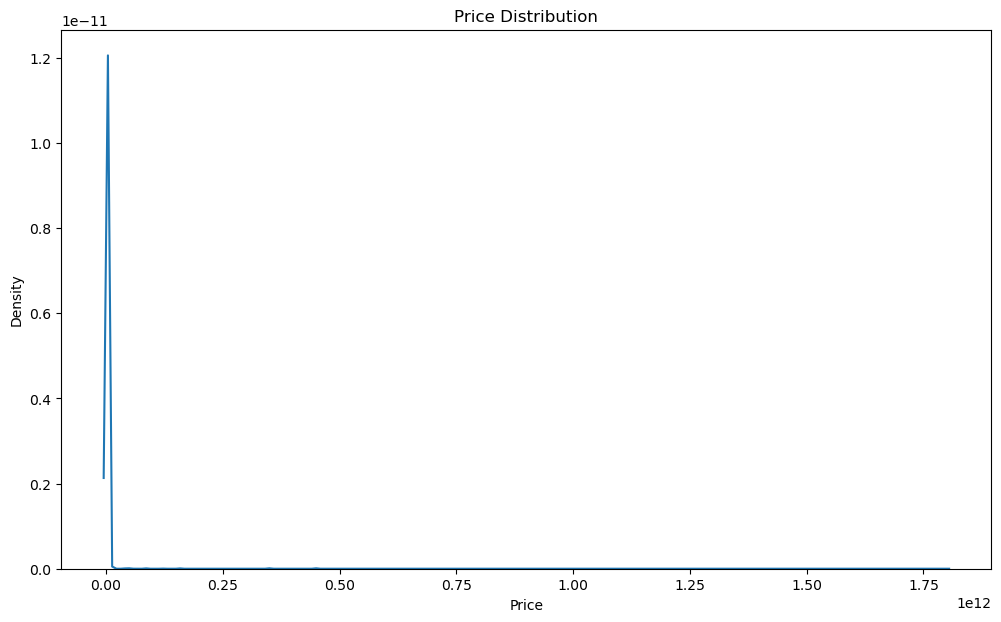

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'price' is the column you want to plot

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the KDE plot for the 'price' column
sns.kdeplot(data=df, x='price')

# Adding titles and labels (optional)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Displaying the plot
plt.show()


#### Filtering Dataset for the Town of Ajah

In [19]:
ajah = df[df['town'] == 'Ajah']
ajah.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0
24,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,60000000.0
36,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,40000000.0
53,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,60000000.0


#### Shape of the Filtered Dataset for the Town of Ajah

In [20]:
# Display the shape (number of rows and columns) of the filtered DataFrame
ajah_shape = ajah.shape

# Print the shape
print(f'The filtered dataset for the town of Ajah contains {ajah_shape[0]} rows and {ajah_shape[1]} columns.')


The filtered dataset for the town of Ajah contains 2142 rows and 8 columns.


#### data cleaning for filtered ajah lagos

#### Unique States in the Filtered Dataset for the Town of Ajah

In [21]:
# Display the unique states present in the filtered DataFrame for Ajah
unique_states_ajah = ajah.state.unique()

# Print the unique states
print(f'The unique states in the filtered dataset for the town of Ajah are: {unique_states_ajah}')


The unique states in the filtered dataset for the town of Ajah are: ['Lagos']


#### Removing Anambra Entries from the Filtered Dataset for the Town of Ajah

In [22]:

# Remove entries where the state is 'Anambra' from the filtered DataFrame for Ajah
ajah_cleaned = ajah[ajah['state'] != 'Anambara']

# Display the filtered DataFrame to confirm removal
ajah_cleaned.head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0
24,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,60000000.0
36,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,40000000.0
53,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,60000000.0


#### Verifying Changes After Removing Entries from Anambara in the Filtered Dataset for Ajah

In [23]:
# Display the unique states present in the cleaned DataFrame for Ajah to verify that 'Anambara' has been removed
unique_states_ajah = ajah_cleaned.state.unique()

# Print the unique states to confirm that 'Anambara' is no longer included in the dataset
print(f'The unique states in the cleaned dataset for the town of Ajah are: {unique_states_ajah}')


The unique states in the cleaned dataset for the town of Ajah are: ['Lagos']


#### Creating a Copy of the Cleaned Dataset for the Town of Ajah

In [24]:
# Create a copy of the cleaned DataFrame for Ajah to preserve the original data
ajah = ajah_cleaned.copy()

# Display the copied DataFrame to confirm the operation
ajah.head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0
24,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,60000000.0
36,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,40000000.0
53,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,60000000.0


#### Summary Statistics of the Cleaned Dataset for the Town of Ajah

In [25]:
# Display summary statistics for the numerical columns in the cleaned DataFrame for Ajah
ajah.describe()


,bedrooms,bathrooms,toilets,parking_space,price
count,2142.000000,2142.000000,2142.000000,2142.000000,2.142000e+03
mean,3.906162,4.232960,4.885154,3.803922,1.039053e+08
std,0.974245,1.040235,1.055169,1.257884,1.409182e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,3.000000,4.000000,4.000000,3.000000,4.000000e+07
50%,4.000000,4.000000,5.000000,4.000000,5.700000e+07
75%,4.000000,5.000000,5.000000,4.000000,7.000000e+07
max,9.000000,9.000000,9.000000,9.000000,5.000000e+10


### Explanation:
The summary statistics provide an overview of the key numerical attributes of the dataset:
- **bedrooms**: The dataset includes 2142 properties. The average number of bedrooms is approximately 3.91, with a standard deviation of 0.97. The number of bedrooms ranges from 1 to 9, with most properties having between 3 and 4 bedrooms.
- **bathrooms**: The average number of bathrooms is about 4.23, with a standard deviation of 1.04. The number of bathrooms ranges from 1 to 9, with most properties having between 4 and 5 bathrooms.
- **toilets**: The average number of toilets is approximately 4.89, with a standard deviation of 1.06. The number of toilets ranges from 1 to 9, with most properties having between 4 and 5 toilets.
- **parking_space**: The average number of parking spaces is around 3.80, with a standard deviation of 1.26. The range is from 1 to 9 parking spaces, with most properties having between 3 and 4 spaces.
- **price**: The average price is approximately 103.9 million Naira, with a very high standard deviation of 1.41 billion Naira. The price ranges from 1 million to 50 billion Naira, with the majority of properties priced between 40 million and 70 million Naira.


#### Average Price of Different Property Types in the Town of Ajah

In [26]:
# Calculate the average price of properties grouped by their type
average_price_by_type = ajah.groupby('title')['price'].mean()

# Display the average prices
print(average_price_by_type)


title
Block of Flats            4.202774e+07
Detached Bungalow         3.401860e+07
Detached Duplex           1.186749e+08
Semi Detached Bungalow    2.878333e+07
Semi Detached Duplex      2.304536e+08
Terraced Bungalow         3.485294e+07
Terraced Duplexes         4.083303e+07
Name: price, dtype: float64


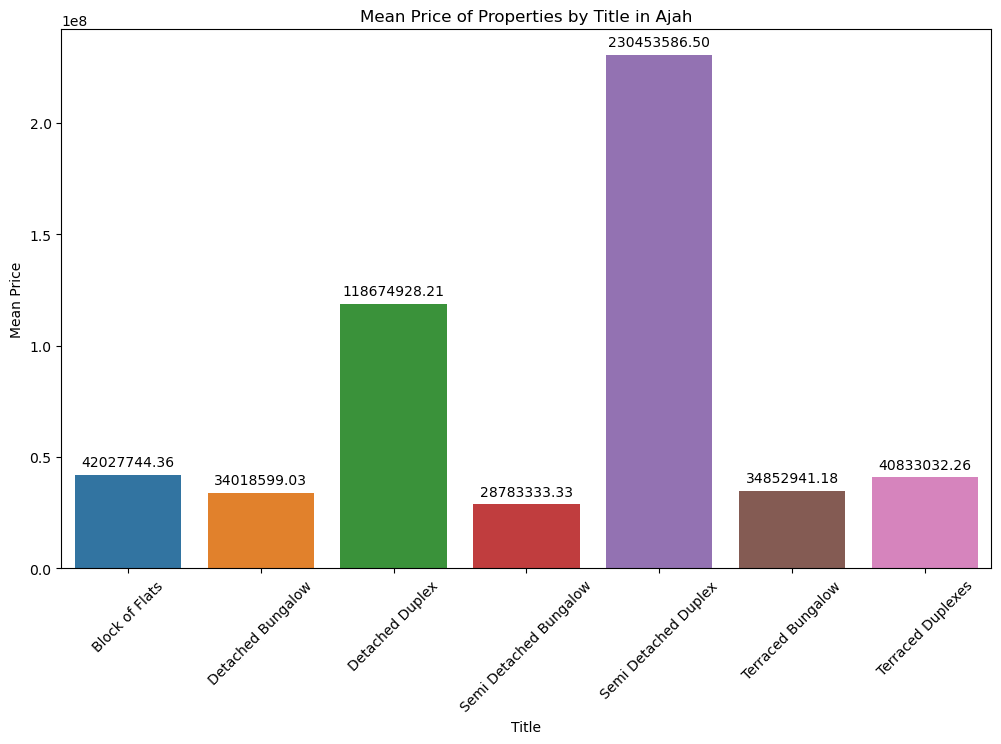

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Ajah' is a subset DataFrame containing properties in the Ajah area

# Calculate the mean price of properties grouped by their titles
mean_prices = ajah.groupby('title')['price'].mean()

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating a bar plot for the mean prices
ax = sns.barplot(x=mean_prices.index, y=mean_prices.values)

# Adding titles and labels (optional)
plt.title('Mean Price of Properties by Title in Ajah')
plt.xlabel('Title')
plt.ylabel('Mean Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding text labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Displaying the plot
plt.show()


#### Explanation:
The average prices for various property types in the town of Ajah are displayed here:

- **Block of Flats**: 42,027,740 Naira
- **Detached Bungalow**: 34,018,600 Naira
- **Detached Duplex**: 118,674,900 Naira
- **Semi Detached Bungalow**: 28,783,330 Naira
- **Semi Detached Duplex**: 230,453,600 Naira
- **Terraced Bungalow**: 34,852,940 Naira
- **Terraced Duplexes**: 40,833,030 Naira

These values indicate the average price of each property type, showing how prices vary among different types of properties.


#### Box Plot of Property Prices by Title in the Town of Ajah

<Figure size 1200x1000 with 0 Axes>

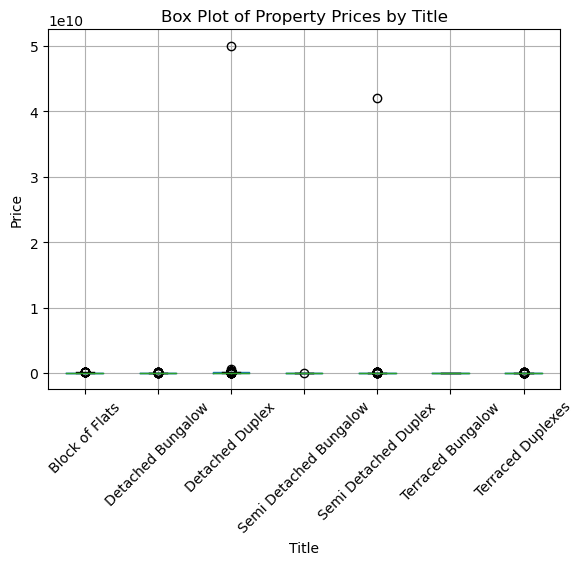

In [28]:
plt.figure(figsize=(12, 10))

# Creating the box plot for the 'price' column based on the 'title' column
ajah.boxplot(column='price', by='title')

# Adding titles and labels (optional)
plt.title('Box Plot of Property Prices by Title')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Title')
plt.ylabel('Price')

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

Note: The box plot appears shrunk due to the presence of excessive outliers in the data.

#### Removing Outliers and Creating a Box Plot of Property Prices by Title in Ajah

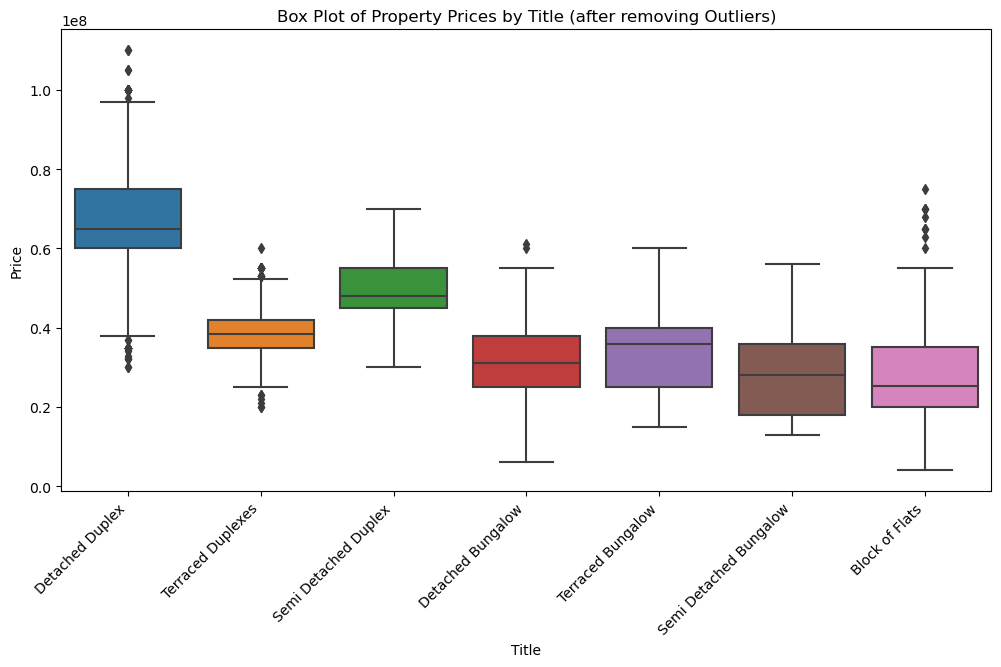

In [29]:
# Function to remove outliers based on IQR
def remove_outliers(df, column, groupby_col):
    Q1 = df.groupby(groupby_col)[column].quantile(0.25)
    Q3 = df.groupby(groupby_col)[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    def is_outlier(row):
        return row[column] < lower_bound[row[groupby_col]] or row[column] > upper_bound[row[groupby_col]]
    
    return df[~df.apply(is_outlier, axis=1)]

# Remove outliers based on 'price' grouped by 'title'
ajah_no_outliers = remove_outliers(ajah, 'price', 'title')

# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating the box plot for the 'price' column based on the 'title' column using Seaborn
sns.boxplot(data=ajah_no_outliers, x='title', y='price')

# Adding titles and labels (optional)
plt.title('Box Plot of Property Prices by Title (after removing Outliers)')
plt.xlabel('Title')
plt.ylabel('Price')

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()

Note: Removing outliers reduces the impact of extreme outliers, but some new outliers may still be detected due to the nature of the data.

#### # Title: Correlation Matrix of Property Attributes in Ajah (After Removing Outliers)

In [30]:
ajah_no_outliers.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_18656\3988505559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ajah_no_outliers.corr()


,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.706906,0.742510,0.292791,0.630870
bathrooms,0.706906,1.000000,0.790504,0.301889,0.505675
toilets,0.742510,0.790504,1.000000,0.259166,0.548273
parking_space,0.292791,0.301889,0.259166,1.000000,0.221846
price,0.630870,0.505675,0.548273,0.221846,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_18656\1322500124.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ajah_no_outliers.corr()


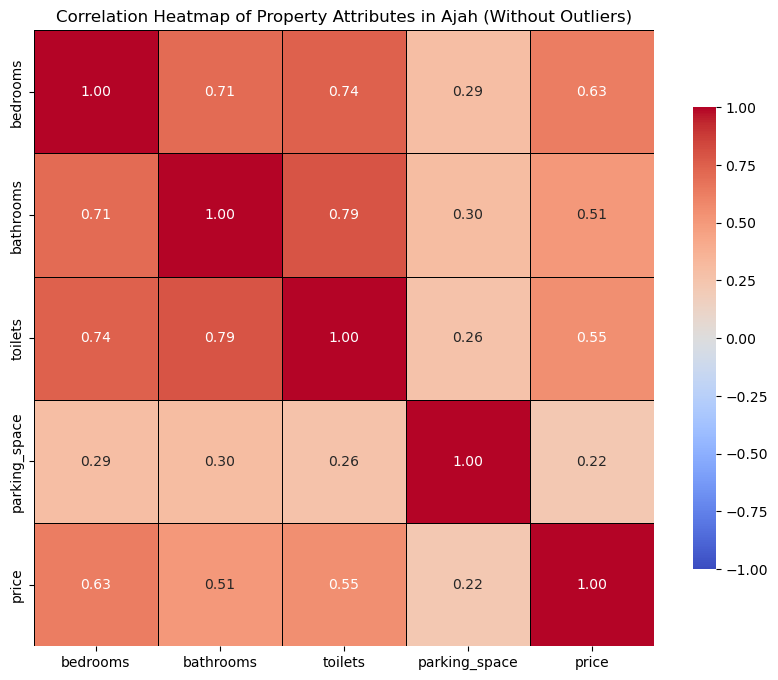

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = ajah_no_outliers.corr()

# Setting the figure size
plt.figure(figsize=(10, 8))

# Creating the heatmap with annotations
sns.heatmap(
    corr_matrix,               # The data to plot
    annot=True,                # Display the correlation coefficients
    fmt='.2f',                 # Format for the annotations
    cmap='coolwarm',           # Color map
    center=0,                  # Center the color map at zero
    vmin=-1, vmax=1,           # Set the limits for the color scale
    linewidths=0.5,            # Width of lines that will divide each cell
    linecolor='black',         # Color of lines that will divide each cell
    cbar_kws={'shrink': .75}   # Color bar shrink factor
)

# Adding titles and labels
plt.title('Correlation Heatmap of Property Attributes in Ajah (Without Outliers)')

# Displaying the plot
plt.show()



The correlation matrix displays the relationships between different property attributes and prices in Ajah after removing outliers:

- **Bedrooms** and **Bathrooms** have a strong positive correlation of 0.71, suggesting that properties with more bedrooms tend to also have more bathrooms.
- **Bedrooms** and **Toilets** are highly correlated (0.74), indicating a similar trend where more bedrooms generally correspond with more toilets.
- **Price** shows a moderate positive correlation with **Bedrooms** (0.63) and **Toilets** (0.55), suggesting that properties with more bedrooms and toilets tend to have higher prices.
- **Price** has a lower correlation with **Parking Space** (0.22), implying that parking space is less influential on property price compared to the number of bedrooms, bathrooms, and toilets.

These correlations provide insights into how property features relate to each other and to the price, helping to understand the factors affecting property values.


#### Title: Scatter Plot of Property Prices vs. Number of Bedrooms in Ajah (Color-Coded by Price)

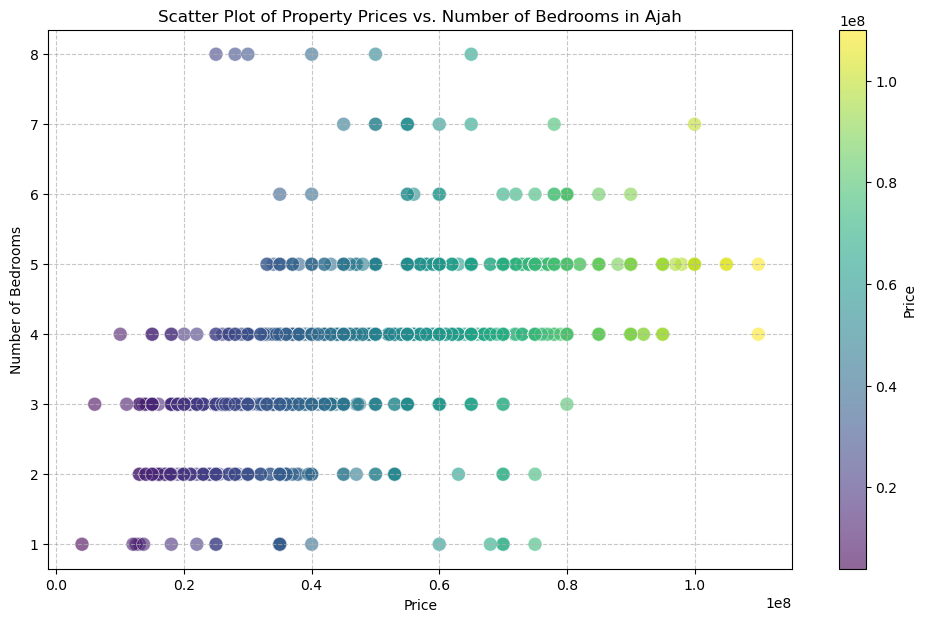

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'bedroom': [your_bedroom_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_no_outliers, 
    x='price', 
    y='bedrooms', 
    c=ajah_no_outliers['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Bedrooms in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


####  Title: Scatter Plot of Property Prices vs. Number of Bathrooms in Ajah (Color-Coded by Price)

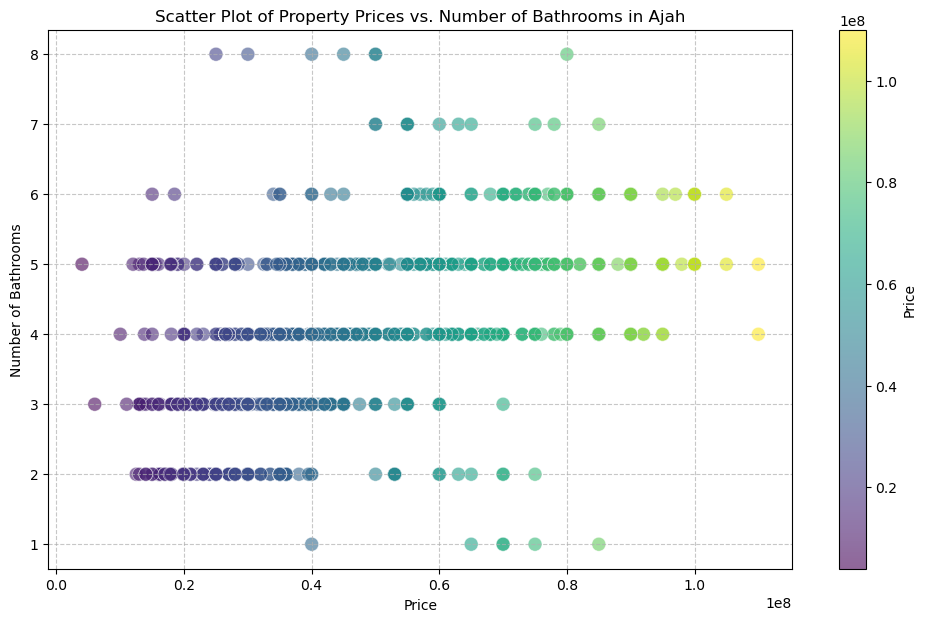

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'bathroom': [your_bathroom_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_no_outliers, 
    x='price', 
    y='bathrooms', 
    c=ajah_no_outliers['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Bathrooms in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


#### Title: Scatter Plot of Property Prices vs. Number of Toilets in Ajah (Color-Coded by Price)


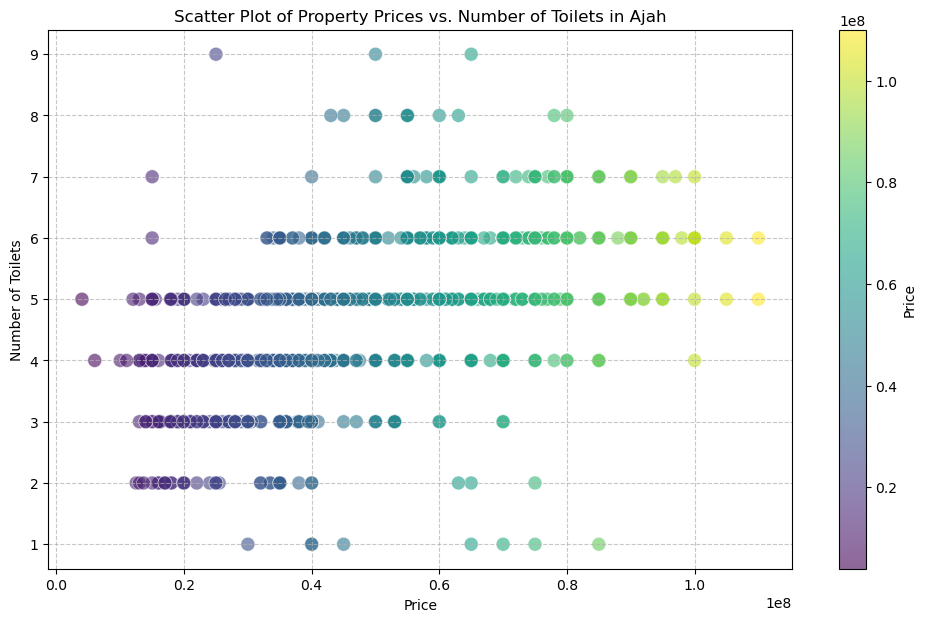

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'toilet': [your_toilet_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_no_outliers, 
    x='price', 
    y='toilets', 
    c=ajah_no_outliers['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Toilets in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Toilets')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


####  Title: KDE Plots of Property Prices for Different House Types in Ajah (Without Outliers)

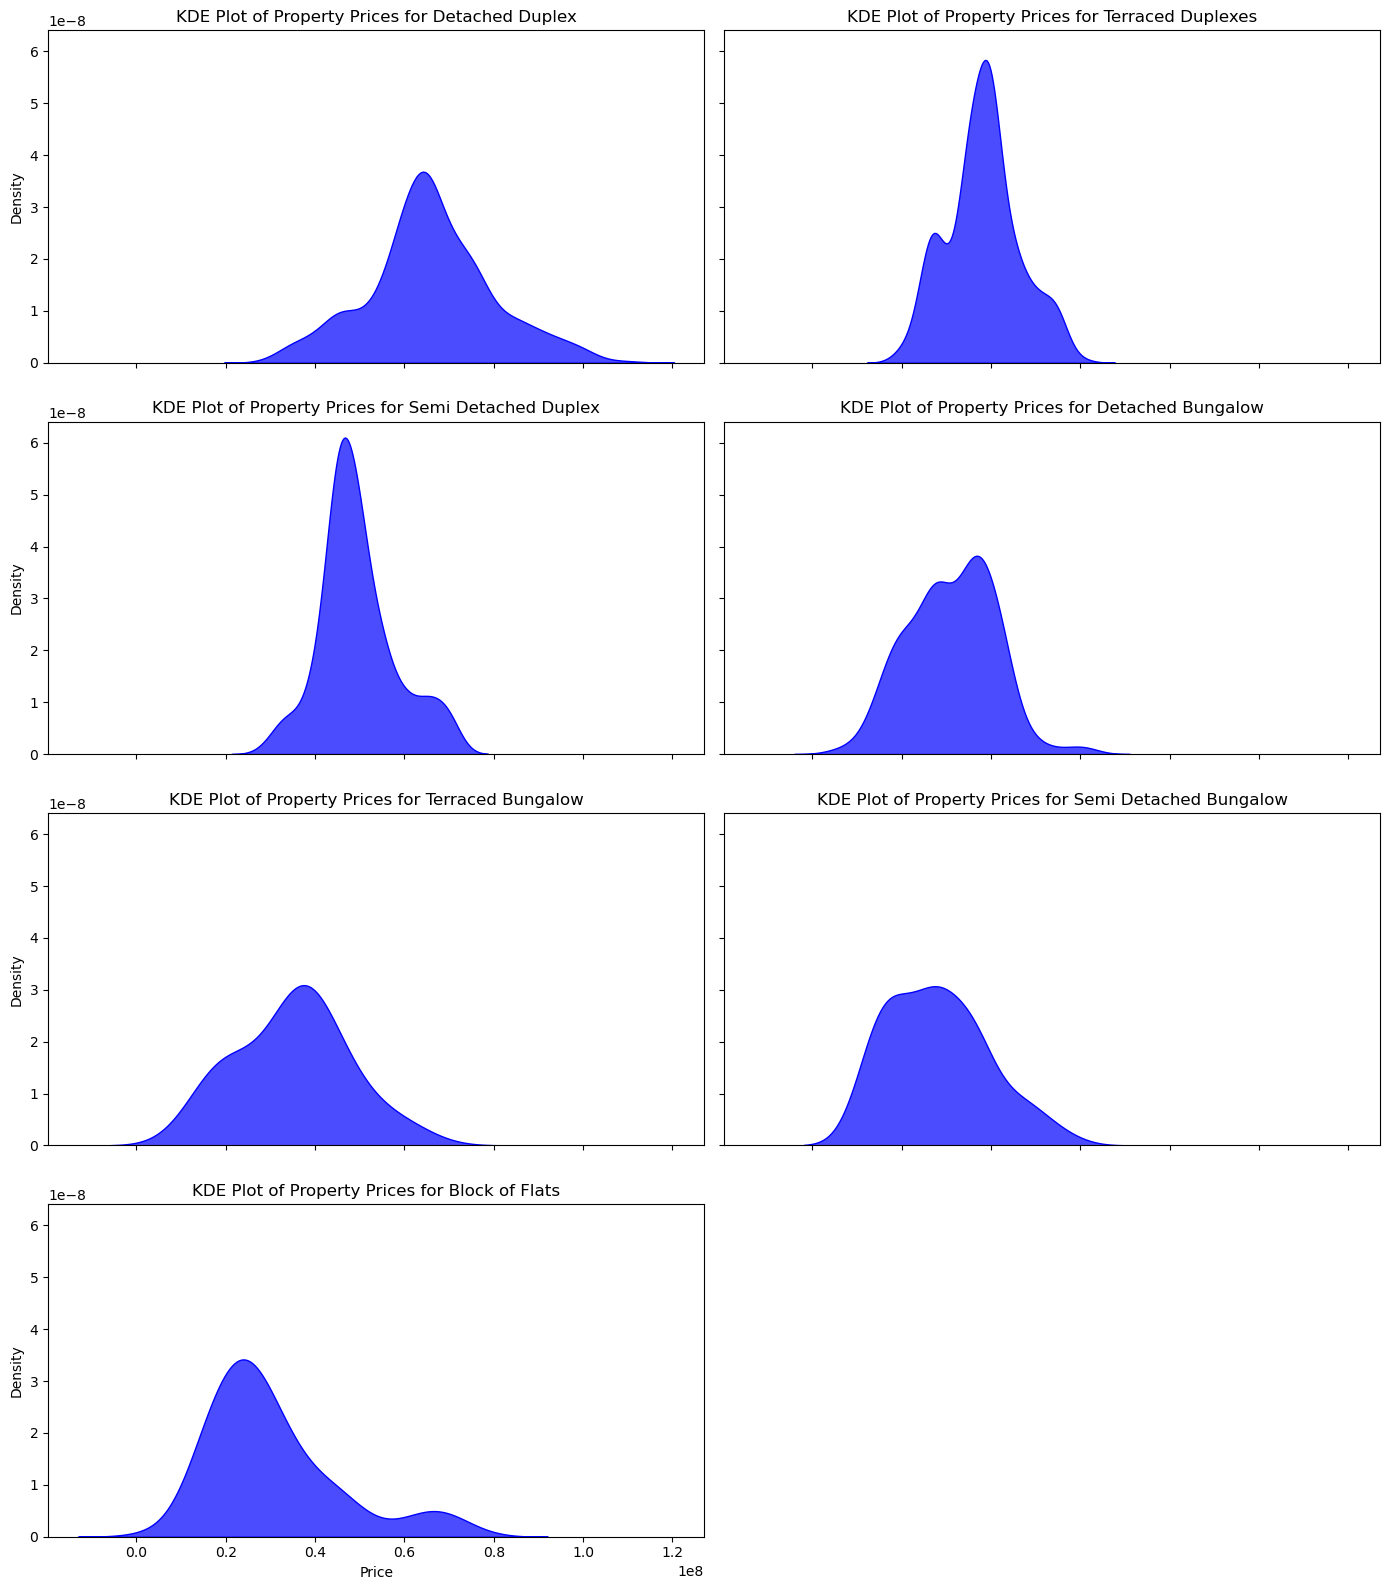

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Unique house types
house_types = ajah_no_outliers['title'].unique()

# Define the number of rows and columns for the subplot grid
num_types = len(house_types)
num_cols = 2  # Number of columns in the grid
num_rows = (num_types + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 4), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot KDE for each house type in its own subplot
for i, house_type in enumerate(house_types):
    subset = ajah_no_outliers[ajah_no_outliers['title'] == house_type]
    sns.kdeplot(subset['price'], ax=axs[i], fill=True, alpha=0.7, color='blue')
    axs[i].set_title(f'KDE Plot of Property Prices for {house_type}')
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(len(house_types), len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()

plt.savefig("housedistriution.png",dpi=300)
# Display the dashboard
plt.show()


#### Title: KDE Plot of Overall Property Price Distribution in Ajah (Without Outliers)


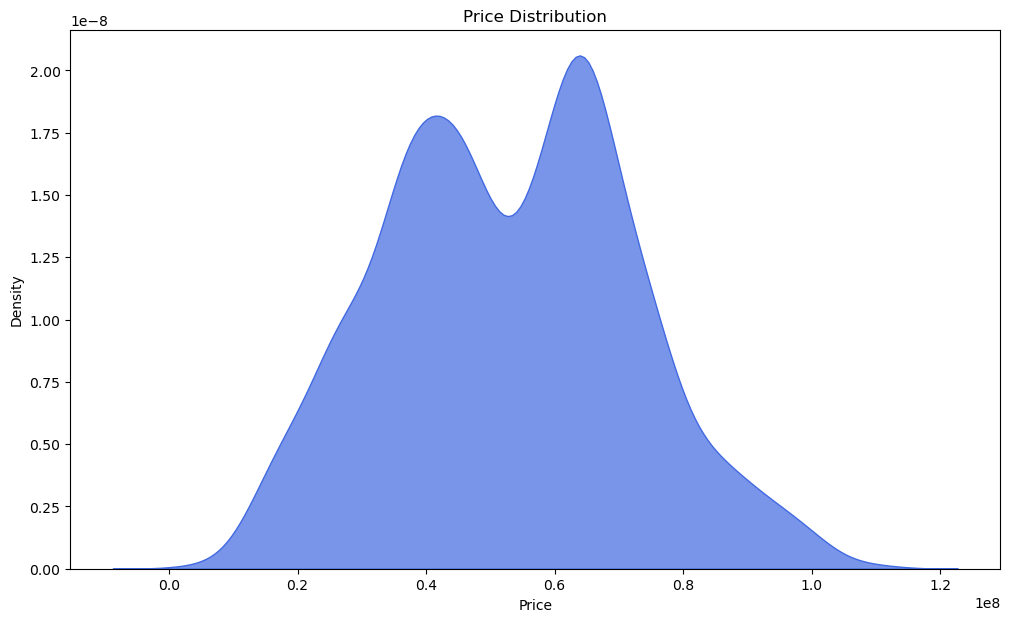

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the KDE plot for the 'price' column with color
sns.kdeplot(data=ajah_no_outliers, x='price', color='royalblue', fill=True, alpha=0.7)

# Adding titles and labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Displaying the plot
plt.show()


#### Title: Encoding Categorical Columns in Ajah Dataset

In [37]:
### test running 

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Title: Encoding Categorical Columns in Ajah Dataset

# Initialize LabelEncoder
encode = LabelEncoder()

# Create dictionaries to store the mappings
town_mapping = {}
title_mapping = {}
state_mapping = {}

# Encode 'town' column
ajah_no_outliers['town'] = encode.fit_transform(ajah_no_outliers['town'])
town_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))

# Encode 'title' column
ajah_no_outliers['title'] = encode.fit_transform(ajah_no_outliers['title'])
title_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))

# Encode 'state' column
ajah_no_outliers['state'] = encode.fit_transform(ajah_no_outliers['state'])
state_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))

# Display the dataframe with overwritten columns
print(ajah_no_outliers.head())

# Print the mappings
print("\nTown Mapping:")
print(town_mapping)
print("\nTitle Mapping:")
print(title_mapping)
print("\nState Mapping:")
print(state_mapping)


    bedrooms  bathrooms  toilets  parking_space  title  town  state  \
3        4.0        4.0      5.0            6.0      2     0      0   
9        4.0        4.0      5.0            5.0      2     0      0   
24       4.0        4.0      5.0            3.0      2     0      0   
36       3.0        5.0      5.0            4.0      6     0      0   
53       4.0        4.0      5.0            3.0      4     0      0   

         price  
3   40000000.0  
9   60000000.0  
24  60000000.0  
36  40000000.0  
53  60000000.0  

Town Mapping:
{'Ajah': 0}

Title Mapping:
{'Block of Flats': 0, 'Detached Bungalow': 1, 'Detached Duplex': 2, 'Semi Detached Bungalow': 3, 'Semi Detached Duplex': 4, 'Terraced Bungalow': 5, 'Terraced Duplexes': 6}

State Mapping:
{'Lagos': 0}


C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4232350792.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_no_outliers['town'] = encode.fit_transform(ajah_no_outliers['town'])
C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4232350792.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_no_outliers['title'] = encode.fit_transform(ajah_no_outliers['title'])
C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4232350792.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [44]:
ajah_no_outliers.drop(['town','state'],axis=1).to_csv("my_data2.csv",index='False')

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Title: Encoding Categorical Columns in Ajah Dataset

# Initialize LabelEncoder
encode = LabelEncoder()

# Encode 'town' column and overwrite it
ajah_no_outliers['town'] = encode.fit_transform(ajah_no_outliers['town'])

# Encode 'title' column and overwrite it
ajah_no_outliers['title'] = encode.fit_transform(ajah_no_outliers['title'])

# Encode 'state' column and overwrite it
ajah_no_outliers['state'] = encode.fit_transform(ajah_no_outliers['state'])

# Display the dataframe with overwritten columns
ajah_no_outliers.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4197545554.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_no_outliers['town'] = encode.fit_transform(ajah_no_outliers['town'])
C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4197545554.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_no_outliers['title'] = encode.fit_transform(ajah_no_outliers['title'])
C:\Users\USER\AppData\Local\Temp\ipykernel_18656\4197545554.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,2,0,0,40000000.0
9,4.0,4.0,5.0,5.0,2,0,0,60000000.0
24,4.0,4.0,5.0,3.0,2,0,0,60000000.0
36,3.0,5.0,5.0,4.0,6,0,0,40000000.0
53,4.0,4.0,5.0,3.0,4,0,0,60000000.0


In [51]:
ajah_no_outliers.drop(['town','state'],axis=1).to_csv('my_data2.csv',index=False)

In [52]:
pd.read_csv("my_data2.csv")

,bedrooms,bathrooms,toilets,parking_space,title,price
0,4.0,4.0,5.0,6.0,2,40000000.0
1,4.0,4.0,5.0,5.0,2,60000000.0
2,4.0,4.0,5.0,3.0,2,60000000.0
3,3.0,5.0,5.0,4.0,6,40000000.0
4,4.0,4.0,5.0,3.0,4,60000000.0
...,...,...,...,...,...,...
1893,2.0,5.0,5.0,4.0,0,50000000.0
1894,5.0,5.0,6.0,6.0,2,70000000.0
1895,4.0,5.0,5.0,4.0,1,28000000.0
1896,3.0,4.0,4.0,3.0,6,40000000.0


## Title: Baseline Model Evaluation Using Random Forest Regressor

In [40]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Title: Baseline Model Evaluation with Random Forest Regressor

# Assuming X and y are your features and target variable
X, y = ajah_no_outliers.drop(columns=['price']), ajah_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=58)

# Define and train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Store the results in a DataFrame
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mae, mape, r2]
})

# Format the numbers to avoid scientific notation
results['Value'] = results['Value'].apply(lambda x: '{:.5f}'.format(x) if isinstance(x, float) else x)

# Save the results to an Excel file
results.to_excel('baseline_model_evaluation_metrics.xlsx', index=False)

results

#### Comment:
# This code defines and evaluates a baseline model using a Random Forest Regressor. 
# The dataset is split into training and testing sets, and the model is trained on the training data. 
# Performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), 
# Mean Absolute Percentage Error (MAPE), and R-squared (R2) are computed to assess the model's performance. 
# The results are stored in a DataFrame and formatted to avoid scientific notation.


,Metric,Value
0,MSE,124487057914615.28125
1,RMSE,11157376.83842
2,MAE,8275060.31165
3,MAPE,19.22092
4,R2,0.67160


## Title: Comprehensive Model Evaluation with Random Forest Regressor, Hyperparameter Tuning, and Recursive Feature Elimination (RFE) for Feature Selection

This script implements a comprehensive modeling approach for predicting property prices. It includes:

    Data Preparation: The dataset is split into training and testing sets.
    Model Definition: A Random Forest Regressor is used as the base model.
    Feature Selection with RFE: Recursive Feature Elimination (RFE) is employed to select the most important features iteratively.
    Hyperparameter Tuning: A randomized search is conducted to find the optimal hyperparameters for the Random Forest model.
    Evaluation: The model's performance is evaluated using metrics like Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R-squared (R²).

In [224]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import RFE
import pickle



# Assuming ajah_no_outliers is your updated DataFrame with additional features
X, y = ajah_no_outliers.drop(columns=['price']), ajah_no_outliers['price']

# Define random state
random_state = 58

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

# Define Random Forest model
model = RandomForestRegressor(random_state=random_state)

# Initialize a list to store results
results = []
best_model = None
best_score = float('inf')

# Iterating over numbers of features to select the optimum features
for fea in range(2, len(X.columns) + 1):  # Updated range to consider all features
    # Define RFE
    rfe = RFE(estimator=model, n_features_to_select=fea, step=1)

    # Combine RFE and Random Forest model
    model_pipeline = Pipeline(steps=[
        ('rfe', rfe),
        ('regressor', model)
    ])

    # Define hyperparameters grid
    param_grid = {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False]
    }

    # Perform randomized search cross-validation
    random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1, random_state=random_state)
    random_search.fit(X_train, y_train)

    # Best parameters found
    best_params = random_search.best_params_
    print(f"Number of features {fea}: Best Parameters: {best_params}")

    # Evaluate the best model
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Get selected features
    rfe_selector = best_estimator.named_steps['rfe']
    selected_features = np.array(X.columns)[rfe_selector.support_]

    # Append results to the list
    results.append({
        'num_features': fea,
        'selected_features': selected_features,
        'mae': mae,
        'mape': mape,
        'rmse': rmse,
        'mse': mse,
        'r2': r2
    })

    # Check if this model is the best so far
    if mae < best_score:
        best_score = mae
        best_model = best_estimator
        best_features = selected_features

    print(f"Number of features {fea}: Mean Squared Error: {mse}")
    print(f"Number of features {fea}: Mean Absolute Error: {mae}")
    print(f"Number of features {fea}: Mean Absolute Percentage Error: {mape}")
    print(f"Number of features {fea}: R-squared: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Create a DataFrame for the best model's predictions and true values
best_y_pred = best_model.predict(X_test)
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_y_pred
})

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions_best_model.csv', index=False)

# Save the best model and selected features to a pickle file
with open('best_model3.pkl', 'wb') as f:
    pickle.dump((best_model, best_features.tolist()), f)

print("Best model and selected features saved to best_model3.pkl")
print("Predictions and true values saved to predictions_best_model.csv")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Number of features 2: Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 30, 'regressor__bootstrap': True}
Number of features 2: Mean Squared Error: 123120519623524.77
Number of features 2: Mean Absolute Error: 8291915.683676167
Number of features 2: Mean Absolute Percentage Error: 0.19152215091445232
Number of features 2: R-squared: 0.6752090410332177
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Number of features 3: Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'log2', 'regressor__max_depth': 20, 'regressor__bootstrap': True}
Number of features 3: Mean Squared Error: 122769260708547.2
Number of features 3: Mean Absolute Error: 8280104.303421194
Number of features 3: Mean Absolute Perce

In [227]:
results_df

,num_features,selected_features,mae,mape,rmse,mse,r2
0,2,"[bedrooms, title]",8.291916e+06,0.191522,1.109597e+07,1.231205e+14,0.675209
1,3,"[bedrooms, parking_space, title]",8.280104e+06,0.191482,1.108013e+07,1.227693e+14,0.676136
2,4,"[bedrooms, toilets, parking_space, title]",8.116022e+06,0.188933,1.099897e+07,1.209773e+14,0.680863
3,5,"[bedrooms, bathrooms, toilets, parking_space, ...",8.088956e+06,0.189566,1.092773e+07,1.194153e+14,0.684983
4,6,"[bedrooms, bathrooms, toilets, parking_space, ...",8.108319e+06,0.190953,1.094097e+07,1.197047e+14,0.684220
5,7,"[bedrooms, bathrooms, toilets, parking_space, ...",8.180069e+06,0.192977,1.101431e+07,1.213151e+14,0.679972


In [ ]:
results_df

#### Effect of Number of Features on Mean Absolute Error (MAE)

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\4028854272.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


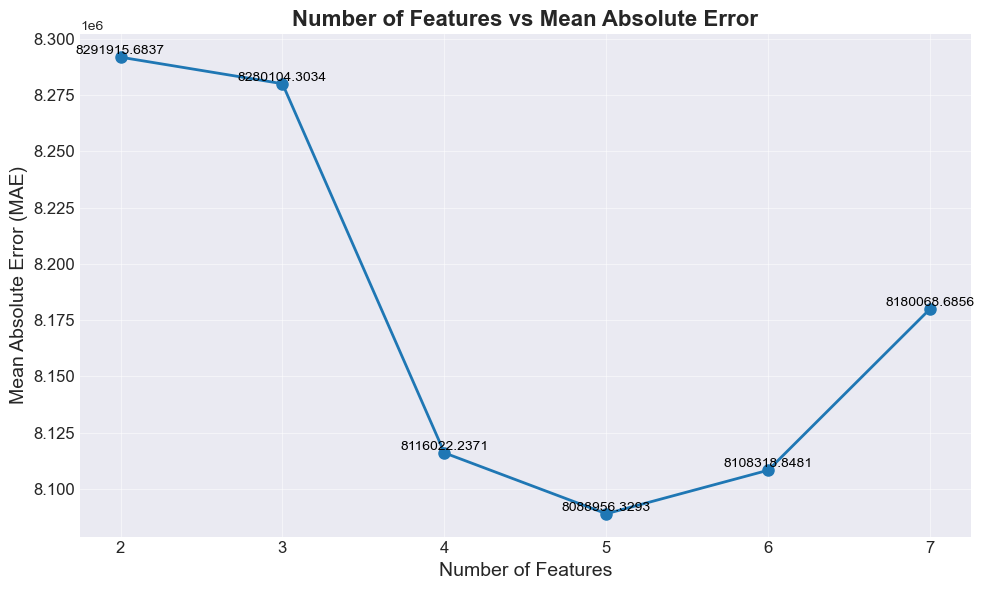

In [228]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['mae'], marker='o', markersize=8, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its MAE value
for x, y in zip(results_df['num_features'], results_df['mae']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs Mean Absolute Error', fontsize=16, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


#### Impact of Number of Features on Mean Absolute Percentage Error (MAPE)

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\666310825.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


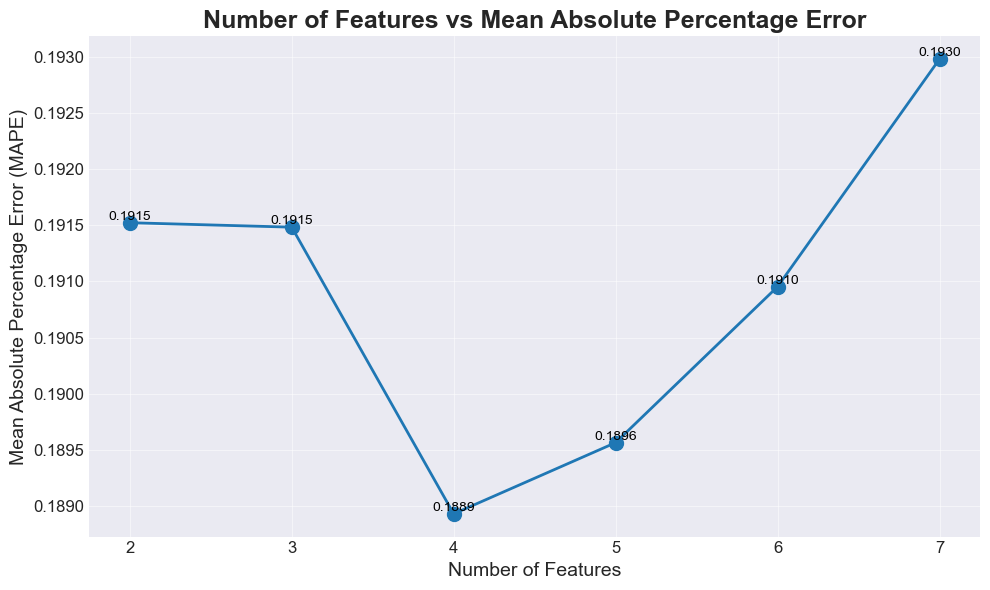

In [229]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['mape'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its MAPE value
for x, y in zip(results_df['num_features'], results_df['mape']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs Mean Absolute Percentage Error', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Absolute Percentage Error (MAPE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


#### Number of Features vs. R-squared Value

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\605691214.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


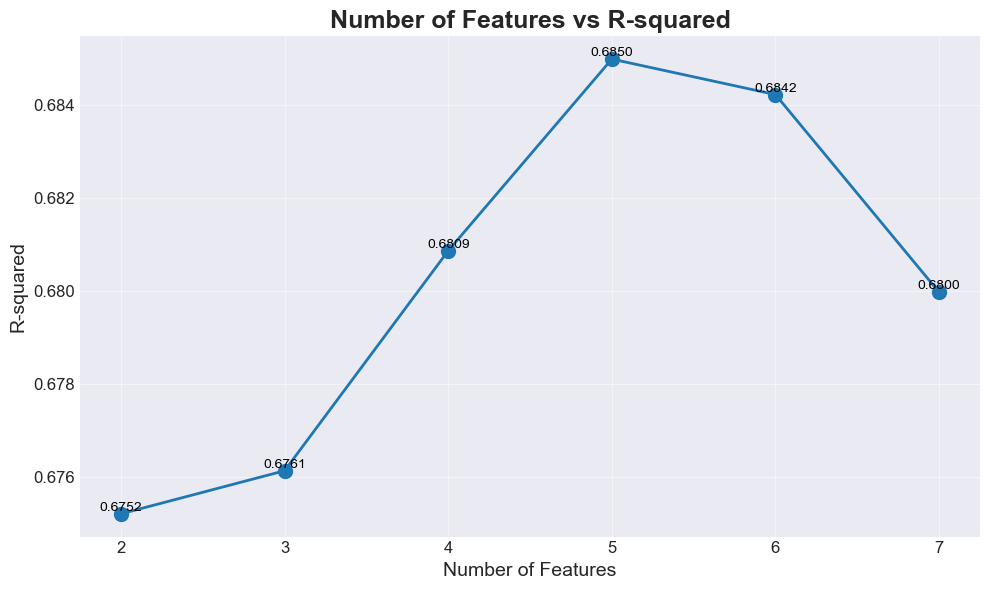

In [230]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['r2'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its R-squared value
for x, y in zip(results_df['num_features'], results_df['r2']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs R-squared', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('R-squared', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


#### Number of Features vs Mean Squared Error (MSE)

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\1354320659.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


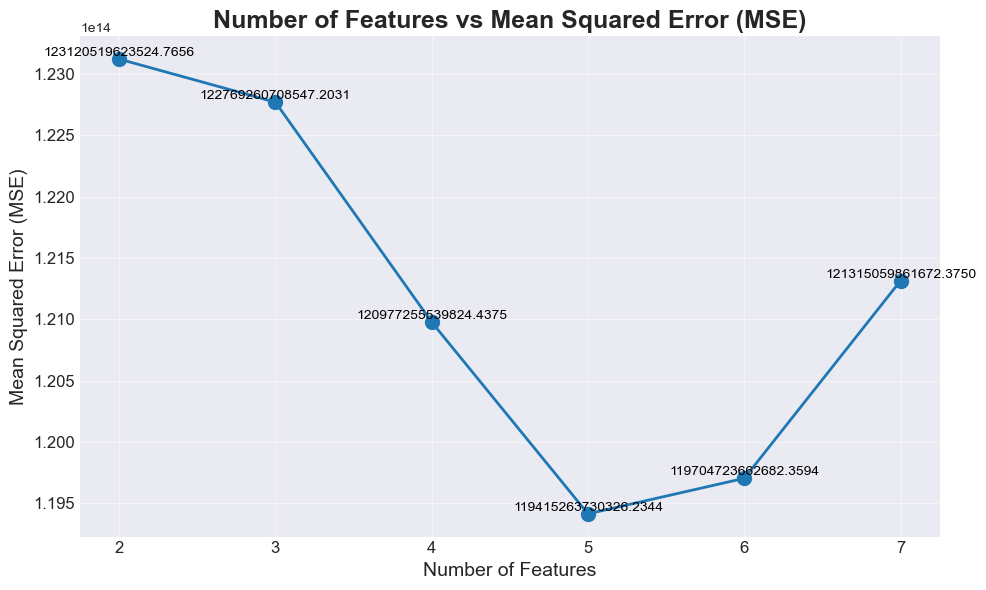

In [231]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['mse'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its MSE value
for x, y in zip(results_df['num_features'], results_df['mse']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs Mean Squared Error (MSE)', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


#### Number of Features vs. Root Mean Squared Error (RMSE)

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\1197116367.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


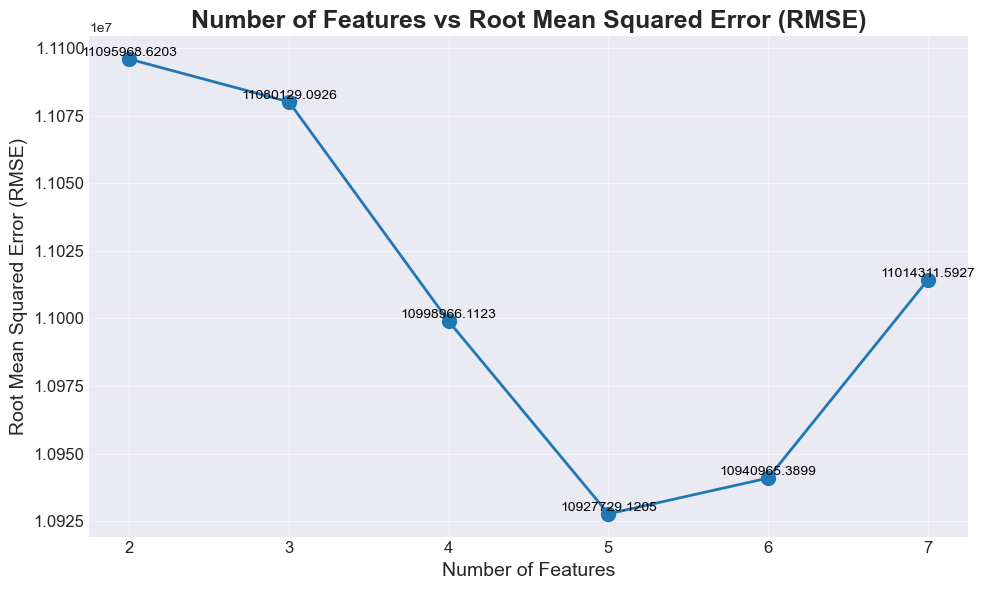

In [232]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['rmse'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its RMSE value
for x, y in zip(results_df['num_features'], results_df['rmse']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs Root Mean Squared Error (RMSE)', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


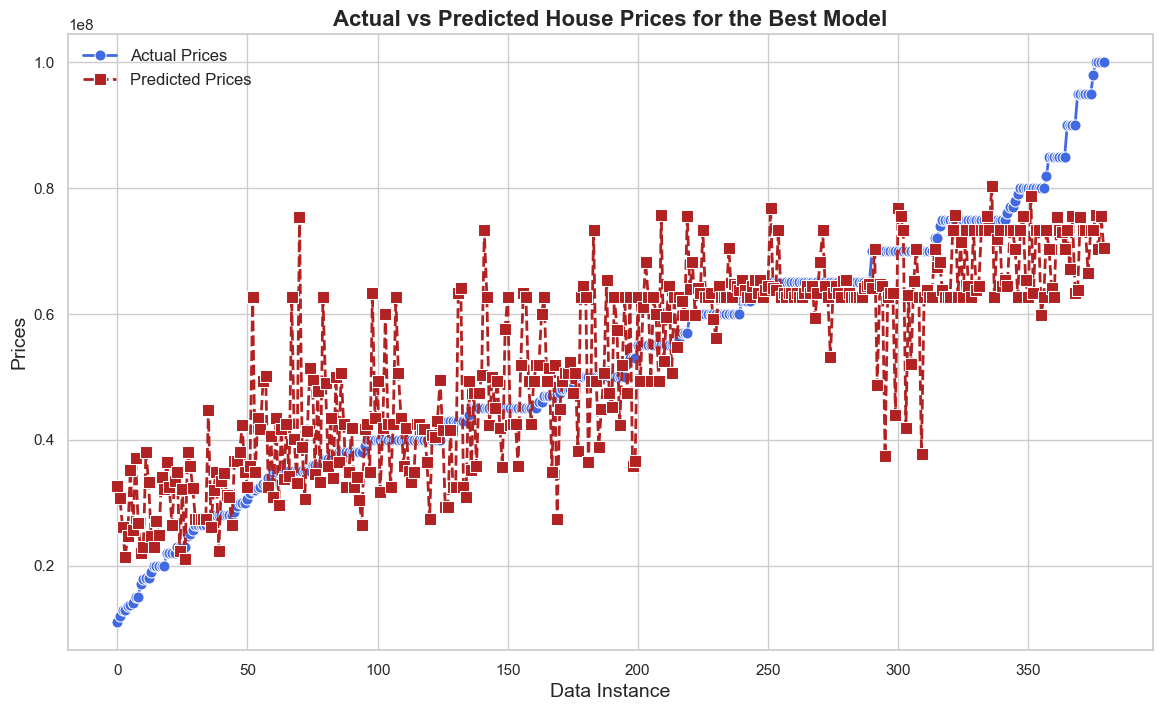

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the predictions and true values
predictions_df = pd.read_csv('predictions_best_model.csv')

# Sort the dataframe by actual values
predictions_df = predictions_df.sort_values(by='Actual').reset_index(drop=True)

# Create a series of indices for the x-axis
x_axis = pd.Series(range(len(predictions_df)))

# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the Seaborn style

# Create a plot with actual and predicted values
sns.lineplot(x=x_axis, y=predictions_df['Actual'], label='Actual Prices', color='royalblue', marker='o', linestyle='-', linewidth=2, markersize=8)
sns.lineplot(x=x_axis, y=predictions_df['Predicted'], label='Predicted Prices', color='firebrick', marker='s', linestyle='--', linewidth=2, markersize=8)

# Adding titles and labels
plt.title('Actual vs Predicted House Prices for the Best Model', fontsize=16, fontweight='bold')
plt.xlabel('Data Instance', fontsize=14)
plt.ylabel('Prices', fontsize=14)

# Adding legend
plt.legend(fontsize=12)

# Show plot
plt.show()


In [241]:
import plotly.graph_objects as go
import pandas as pd

# Load the DataFrame with 'Actual' and 'Predicted' columns
predictions_df = pd.read_csv('predictions_best_model.csv')

# Sort the dataframe by actual values
predictions_df = predictions_df.sort_values(by='Actual').reset_index(drop=True)

# Create a series of indices for the x-axis
x_axis = pd.Series(range(len(predictions_df)))

# Create the figure
fig = go.Figure()

# Add trace for Actual Prices
fig.add_trace(go.Scatter(
    x=x_axis,
    y=predictions_df['Actual'],
    mode='markers+lines',
    name='Actual Prices',
    marker=dict(color='royalblue', size=10, line=dict(width=2, color='black')),
    line=dict(color='royalblue', width=2),
    text=predictions_df['Actual'],  # Optional: Show values on hover
    textposition='top center'
))

# Add trace for Predicted Prices
fig.add_trace(go.Scatter(
    x=x_axis,
    y=predictions_df['Predicted'],
    mode='markers+lines',
    name='Predicted Prices',
    marker=dict(color='firebrick', size=10, symbol='square', line=dict(width=2, color='black')),
    line=dict(color='firebrick', width=2, dash='dash'),
    text=predictions_df['Predicted'],  # Optional: Show values on hover
    textposition='bottom center'
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted House Prices for the Best Model',
    xaxis_title='Data Instance',
    yaxis_title='Prices',
    legend_title='Legend',
    font=dict(size=14),
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(l=50, r=50, t=50, b=50),
    height=600,
    width=900
)

# Show plot
fig.show()


In [249]:
predictions_df

,Actual,Predicted
0,11000000.0,3.267228e+07
1,12000000.0,3.069431e+07
2,13000000.0,2.618902e+07
3,13000000.0,2.129944e+07
4,13650000.0,2.471680e+07
...,...,...
375,98000000.0,7.327462e+07
376,100000000.0,7.575592e+07
377,100000000.0,7.031190e+07
378,100000000.0,7.559292e+07
